In [12]:
import matplotlib.pyplot as plt
import astropy.units as u
from astroquery.gaia import Gaia
from astroquery.simbad import Simbad
import astropy.coordinates as coord
import numpy as np

In [6]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [7]:
Gaia.MAIN_GAIA_TABLE = "gaiaedr3.gaia_source"

In [8]:
def angularSeparation(ra1, dec1, ra2, dec2):
    d2r = np.pi/180.
    ra2deg = 1./d2r
    d1 = dec1*d2r,
    d2 = dec2*d2r
    r1 = ra1*d2r
    r2 = ra2*d2r
    a = np.sin((d2-d1)/2.)**2.+np.cos(d1)*np.cos(d2)*np.sin((r2-r1)/2.)**2.
    r = 2*np.arcsin(np.sqrt(a))
    return r*ra2deg

In [77]:
ra,dec=283.13907937703993, 49.1195445113176

In [36]:
# define the search box
width = u.Quantity(0.05, u.deg)
height = u.Quantity(0.05, u.deg)

query_success=0
while query_success==0:
    #print(ra,dec)
    try:
        r = Gaia.query_object_async(coordinate=coord.SkyCoord(ra=ra, dec=dec, unit=(u.degree, u.degree),
                                                      frame='icrs'), width=width, height=height)
        query_success=1
    except TimeoutError:
        pass

INFO: Query finished. [astroquery.utils.tap.core]


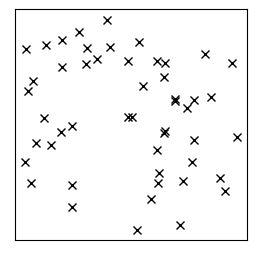

In [39]:
plt.figure(figsize=(3,3))
plt.xticks([]);plt.yticks([]);
ra_gaia,dec_gaia = np.array(r['ra']),np.array(r['dec'])
plt.plot(ra_gaia,dec_gaia,'kx')

In [55]:
ix_finite = np.where(np.isfinite(ra_gaia) & np.isfinite(dec_gaia))
d = angularSeparation(ra,dec,ra_gaia[ix_finite],dec_gaia[ix_finite])
try:
    ix_match = np.argmin(d)
except ValueError:
    print(f"No matching Gaia source for {i}")
    raise

In [60]:
ix_match = np.argmin(r[np.where(d*60*60 < 3)]['parallax_over_error'])

In [61]:
ix = ix_finite[0][ix_match]
gaia_match_offset=angularSeparation(ra,dec,r[ix]['ra'],r[ix]['dec'])*60*60
print(f"{gaia_match_offset[0]} as")

2.085979420602551 as


In [62]:
gaia_dr3_source_id=r[ix]['source_id']
par,par_err = r[ix]['parallax'],r[ix]['parallax_error']
gaia_distance=1000/par
print(gaia_dr3_source_id,'@',f'{gaia_distance} parsecs')

2134924171493605504 @ 593.1873791674067 parsecs


In [68]:
gaia_parallax_over_err = r[ix]['parallax_over_error']
gaia_parallax_over_err

4.280282

In [ ]:
######
# LEGAL VOTable fields defined in:
# https://github.com/astropy/astroquery/blob/main/astroquery/simbad/data/votable_fields_dict.json

In [78]:
Simbad.add_votable_fields("otype","parallax","sp")
r = Simbad.query_region(coord.SkyCoord(ra,dec,
                        unit=(u.deg, u.deg)),#, frame='icrs'),
                        radius=35/60/60*u.deg)

In [81]:
r['SP_TYPE']

K0
